<a href="https://colab.research.google.com/github/gnye8/RBP_Prediction/blob/main/notebooks/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [66]:
X_train = np.load('/content/X_train2.npy')
X_test = np.load('/content/X_test2.npy')
y_train = np.load('/content/y_train2.npy')
y_test = np.load('/content/y_test2.npy')

X_extval = np.load('/content/X_extval.npy')
y_extval = np.load('/content/y_extval.npy')

LeNet Architecture



source: https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide

In [11]:
LeNet = Sequential()
LeNet.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
LeNet.add(MaxPooling2D(pool_size=(3,1)))
LeNet.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
LeNet.add(MaxPooling2D(pool_size=(3,1)))
LeNet.add(Flatten())
LeNet.add(Dense(128, activation='relu'))
LeNet.add(Dense(64, activation='relu'))
LeNet.add(Dense(1, activation='sigmoid'))

LeNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 406, 4, 128)       3584      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 135, 4, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 135, 4, 128)       442496    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 4, 128)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 23040)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [12]:
LeNet.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [13]:
LeNet.fit(X_train, y_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
219/219 [==============================] - 8s 15ms/step - loss: 0.6504 - accuracy: 0.5956 - val_loss: 0.5275 - val_accuracy: 0.7380
Epoch 2/50
219/219 [==============================] - 2s 10ms/step - loss: 0.4427 - accuracy: 0.7985 - val_loss: 0.4044 - val_accuracy: 0.8269
Epoch 3/50
219/219 [==============================] - 2s 10ms/step - loss: 0.3616 - accuracy: 0.8426 - val_loss: 0.3543 - val_accuracy: 0.8525
Epoch 4/50
219/219 [==============================] - 2s 10ms/step - loss: 0.3330 - accuracy: 0.8562 - val_loss: 0.3484 - val_accuracy: 0.8523
Epoch 5/50
219/219 [==============================] - 2s 10ms/step - loss: 0.3119 - accuracy: 0.8675 - val_loss: 0.3355 - val_accuracy: 0.8571
Epoch 6/50
219/219 [==============================] - 2s 10ms/step - loss: 0.2923 - accuracy: 0.8759 - val_loss: 0.3449 - val_accuracy: 0.8558
Epoch 7/50
219/219 [==============================] - 2s 10ms/step - loss: 0.2773 - accuracy: 0.8839 - val_loss: 0.3357 - val_accuracy: 0.8590

VGG Model Architecture


source: https://builtin.com/machine-learning/vgg16

In [14]:
vgg = Sequential()
vgg.add(Conv2D(64, kernel_size=(9,3), activation='relu', input_shape=[406,4,1], padding='same'))
vgg.add(MaxPooling2D(pool_size=(3,1), strides=(2,2)))
vgg.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
vgg.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
vgg.add(MaxPooling2D(pool_size=(3,1), strides=(2,2)))
vgg.add(Conv2D(filters=128, kernel_size=(9,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(9,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(9,3), padding="same", activation="relu"))
vgg.add(MaxPooling2D(pool_size=(3,1),strides=(2,2)))
vgg.add(Conv2D(filters=128, kernel_size=(9,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(9,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=128, kernel_size=(9,3), padding="same", activation="relu"))
vgg.add(MaxPooling2D(pool_size=(3,1),strides=(2,2)))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPooling2D(pool_size=(3,1),strides=(2,2)))
vgg.add(Flatten())
vgg.add(Dense(units=128, activation='relu'))
vgg.add(Dense(units=128, activation='relu'))
vgg.add(Dense(1, activation='sigmoid'))

print(vgg.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 406, 4, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 202, 2, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 202, 2, 128)       221312    
                                                                 
 conv2d_21 (Conv2D)          (None, 202, 2, 128)       442496    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 100, 1, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 1, 128)      

In [15]:
vgg.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [16]:
vgg.fit(X_train, y_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
219/219 [==============================] - 8s 24ms/step - loss: 0.6914 - accuracy: 0.5312 - val_loss: 0.6911 - val_accuracy: 0.5323
Epoch 2/50
219/219 [==============================] - 3s 15ms/step - loss: 0.6911 - accuracy: 0.5322 - val_loss: 0.6911 - val_accuracy: 0.5323
Epoch 3/50
219/219 [==============================] - 3s 15ms/step - loss: 0.6912 - accuracy: 0.5322 - val_loss: 0.6911 - val_accuracy: 0.5323
Epoch 4/50
219/219 [==============================] - 3s 15ms/step - loss: 0.6911 - accuracy: 0.5322 - val_loss: 0.6911 - val_accuracy: 0.5323
Epoch 5/50
219/219 [==============================] - 3s 15ms/step - loss: 0.6911 - accuracy: 0.5322 - val_loss: 0.6911 - val_accuracy: 0.5323
Epoch 6/50
219/219 [==============================] - 3s 15ms/step - loss: 0.6911 - accuracy: 0.5322 - val_loss: 0.6911 - val_accuracy: 0.5323
Epoch 7/50
219/219 [==============================] - 3s 15ms/step - loss: 0.6911 - accuracy: 0.5322 - val_loss: 0.6911 - val_accuracy: 0.5323

LeNet Optimization

I will optimize LeNet over VGG because it is faster to train/fit and has significantly better accuracy.

In order to improve accuracy, I will add an additional cycle of convolutions and max pooling, and in order to prevent overfitting, I will insert dropout layers between convolution/max pooling steps.

In [67]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 406, 4, 128)       3584      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 135, 4, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 135, 4, 128)       442496    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 4, 128)        0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 23040)             0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [68]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
219/219 [==============================] - 4s 15ms/step - loss: 0.6492 - accuracy: 0.6044 - val_loss: 0.5531 - val_accuracy: 0.7448
Epoch 2/50
219/219 [==============================] - 3s 14ms/step - loss: 0.4644 - accuracy: 0.7804 - val_loss: 0.3675 - val_accuracy: 0.8415
Epoch 3/50
219/219 [==============================] - 3s 13ms/step - loss: 0.3830 - accuracy: 0.8304 - val_loss: 0.3489 - val_accuracy: 0.8509
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 0.3593 - accuracy: 0.8440 - val_loss: 0.3451 - val_accuracy: 0.8547
Epoch 5/50
219/219 [==============================] - 3s 14ms/step - loss: 0.3467 - accuracy: 0.8495 - val_loss: 0.3363 - val_accuracy: 0.8589
Epoch 6/50
219/219 [==============================] - 3s 14ms/step - loss: 0.3327 - accuracy: 0.8573 - val_loss: 0.3357 - val_accuracy: 0.8579
Epoch 7/50
219/219 [==============================] - 3s 14ms/step - loss: 0.3268 - accuracy: 0.8587 - val_loss: 0.3299 - val_accuracy: 0.8558

In [70]:
val_predicts = model.predict(X_test)
y_preds = [1 * (x[0]>=0.5) for x in val_predicts]
#print(y_preds)

195/195 [==============================] - 0s 2ms/step


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2910
           1       0.88      0.84      0.86      3312

    accuracy                           0.85      6222
   macro avg       0.85      0.85      0.85      6222
weighted avg       0.85      0.85      0.85      6222



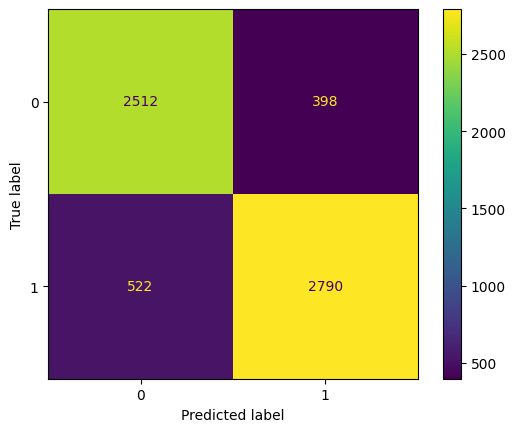

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


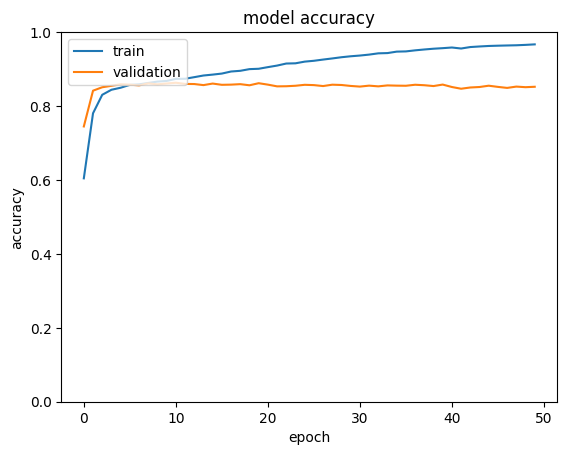

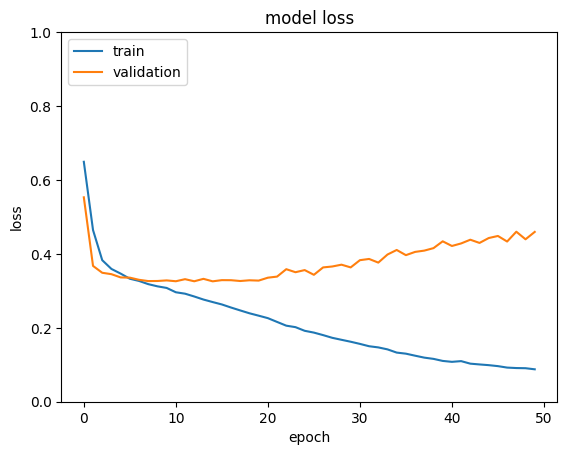

In [73]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Eterna base pairing data

Now we will try running the same model with our secondary structure features to see if this improves performance.

In [82]:
X_bp_train = np.load('/content/X_bp_train.npy')
X_bp_test = np.load('/content/X_bp_test.npy')
y_bp_train = np.load('/content/y_bp_train.npy')
y_bp_test = np.load('/content/y_bp_test.npy')

X_bp_extval = np.load('/content/X_bp_extval.npy')
y_bp_extval = np.load('/content/y_bp_extval.npy')

In [83]:
model2 = Sequential()
model2.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
model2.add(MaxPooling2D(pool_size=(3,1)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3,1)))
model2.add(Dropout(0.25))
model2.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3,1)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 406, 4, 128)       3584      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 135, 4, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 135, 4, 128)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 135, 4, 128)       442496    
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 45, 4, 128)        0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 45, 4, 128)      

In [84]:
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [85]:
history2 = model2.fit(X_bp_train, y_bp_train, batch_size=256, epochs=50, verbose=1, validation_data=(X_bp_test, y_bp_test))

Epoch 1/50
219/219 [==============================] - 4s 15ms/step - loss: 0.6453 - accuracy: 0.6105 - val_loss: 0.5236 - val_accuracy: 0.7369
Epoch 2/50
219/219 [==============================] - 3s 13ms/step - loss: 0.4693 - accuracy: 0.7760 - val_loss: 0.3958 - val_accuracy: 0.8251
Epoch 3/50
219/219 [==============================] - 3s 14ms/step - loss: 0.4049 - accuracy: 0.8179 - val_loss: 0.3725 - val_accuracy: 0.8399
Epoch 4/50
219/219 [==============================] - 3s 14ms/step - loss: 0.3836 - accuracy: 0.8298 - val_loss: 0.3623 - val_accuracy: 0.8457
Epoch 5/50
219/219 [==============================] - 3s 13ms/step - loss: 0.3680 - accuracy: 0.8381 - val_loss: 0.3501 - val_accuracy: 0.8504
Epoch 6/50
219/219 [==============================] - 3s 13ms/step - loss: 0.3582 - accuracy: 0.8440 - val_loss: 0.3582 - val_accuracy: 0.8457
Epoch 7/50
219/219 [==============================] - 3s 13ms/step - loss: 0.3497 - accuracy: 0.8467 - val_loss: 0.3482 - val_accuracy: 0.8496

In [86]:
val_bp_predicts = model2.predict(X_bp_test)
y_bp_preds = [1 * (x[0]>=0.5) for x in val_bp_predicts]
print(classification_report(y_bp_test, y_bp_preds))

195/195 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2910
           1       0.86      0.85      0.85      3312

    accuracy                           0.84      6222
   macro avg       0.84      0.84      0.84      6222
weighted avg       0.85      0.84      0.84      6222



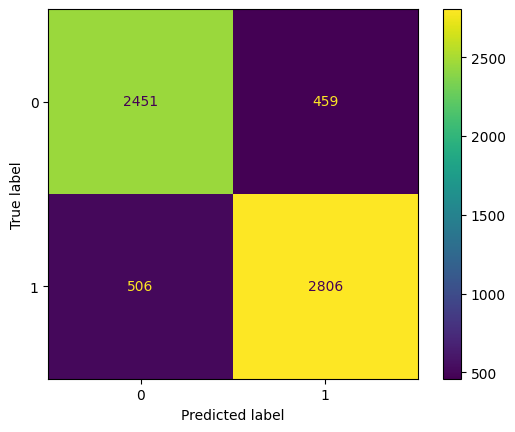

In [87]:
cm = confusion_matrix(y_bp_test, y_bp_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


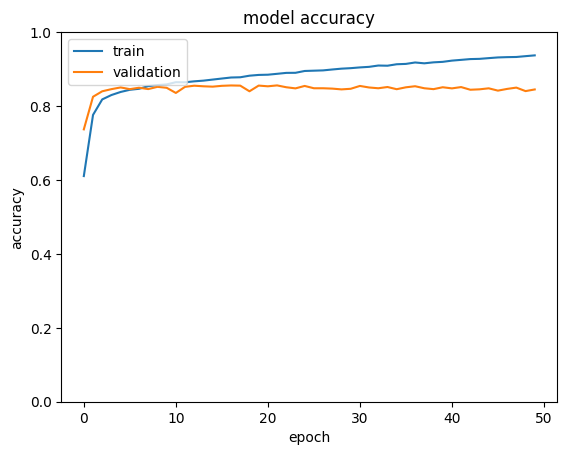

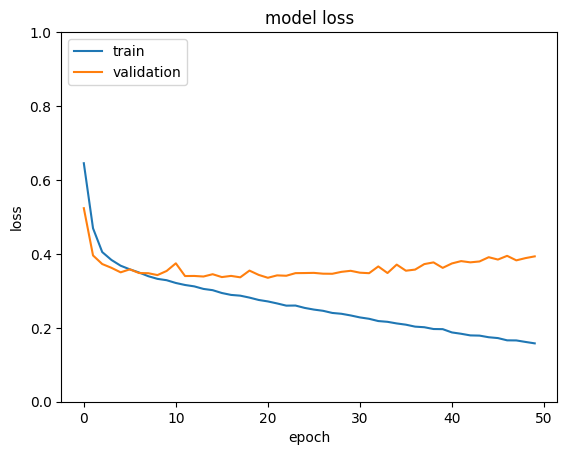

In [88]:
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim(0, 1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

We can see from these graphs that over the epochs we are training the model, the validation set seems to plateau (in both loss and accuracy) after around 10 epochs, even as the training set continues to improve. This indicates that the model might be overfitting with further training. Therefore, we should reduce the number of epochs to around 10 or 20.



### Parameter Tuning

We will now tune the parameters that we are using for model training.

Parameters we will focus on are:

- dropout size
- learning rate
- batch size
- epoch number

### Batch Size and Number of Epochs

In [75]:
!pip install scikeras

In [101]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from scikeras.wrappers import KerasClassifier

def create_model():
  model = Sequential()
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.legacy.Adam(), metrics=['accuracy'])
  return model

seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model, verbose=0)
batch_size = [128]
epochs = [10, 20, 30]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.855168 using {'batch_size': 128, 'epochs': 10}
0.855168 (0.002385) with: {'batch_size': 128, 'epochs': 10}
0.847934 (0.001262) with: {'batch_size': 128, 'epochs': 20}
0.843112 (0.001902) with: {'batch_size': 128, 'epochs': 30}


I would run this with 256 batch size, but it does not have the memory, and performance does not seem to be decreased from 256 to 128 batch size.

### Optimizer

In [123]:
def create_model_opt(optimizer):
  model = Sequential()
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model_opt, epochs=10, batch_size=128, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adam']
param_grid = dict(model__optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result2 = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851703 using {'model__optimizer': 'RMSprop'}
0.631892 (0.008655) with: {'model__optimizer': 'SGD'}
0.851703 (0.009262) with: {'model__optimizer': 'RMSprop'}
0.851167 (0.005705) with: {'model__optimizer': 'Adam'}


### Learning Rate and Momentum

In [126]:
from tensorflow.keras.optimizers import Adam

def create_model_opt2():
  model = Sequential()
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))
  return model

seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model_opt2, loss='binary_crossentropy', optimizer='Adam', epochs=10, batch_size=128, verbose=0)

learn_rate = [0.001, 0.0001]

param_grid = dict(optimizer__learning_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result3 = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856900 using {'optimizer__learning_rate': 0.0001}
0.749076 (0.153340) with: {'optimizer__learning_rate': 0.001}
0.856900 (0.001421) with: {'optimizer__learning_rate': 0.0001}


Although RMSprop and Adam perform comparably, we chose to use Adam for efficiency, especially as we have seen it have higher accuracies in the past.

Dropout Rate

In [107]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from scikeras.wrappers import KerasClassifier

def create_model(dropout_rate):
  model = Sequential()
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(dropout_rate))
  model.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(dropout_rate))
  model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(3,1)))
  model.add(Dropout(dropout_rate))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model, epochs=10, batch_size=128, verbose=0)
dropout_rate = [0.25, 0.5]

param_grid = dict(model__dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result4 = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851471 using {'model__dropout_rate': 0.25}
0.851471 (0.001398) with: {'model__dropout_rate': 0.25}
0.824233 (0.014105) with: {'model__dropout_rate': 0.5}


Final parameters for our model:
- batch size = 128
- epochs = 10
- optimizer = adam
- learning rate = 0.0001
- dropout rate = 0.25

## Final Validation

First, we will run the final model on our sequence only dataset.

In [108]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_106 (Conv2D)         (None, 406, 4, 128)       3584      
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 135, 4, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_104 (Dropout)       (None, 135, 4, 128)       0         
                                                                 
 conv2d_107 (Conv2D)         (None, 135, 4, 128)       442496    
                                                                 
 max_pooling2d_93 (MaxPooli  (None, 45, 4, 128)        0         
 ng2D)                                                           
                                                                 
 dropout_105 (Dropout)       (None, 45, 4, 128)      

In [109]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
438/438 [==============================] - 6s 9ms/step - loss: 0.6697 - accuracy: 0.5790 - val_loss: 0.6186 - val_accuracy: 0.6644
Epoch 2/10
438/438 [==============================] - 4s 9ms/step - loss: 0.5620 - accuracy: 0.7122 - val_loss: 0.4885 - val_accuracy: 0.7647
Epoch 3/10
438/438 [==============================] - 4s 9ms/step - loss: 0.4488 - accuracy: 0.7927 - val_loss: 0.4062 - val_accuracy: 0.8182
Epoch 4/10
438/438 [==============================] - 4s 9ms/step - loss: 0.3882 - accuracy: 0.8286 - val_loss: 0.3770 - val_accuracy: 0.8329
Epoch 5/10
438/438 [==============================] - 4s 9ms/step - loss: 0.3593 - accuracy: 0.8450 - val_loss: 0.3506 - val_accuracy: 0.8517
Epoch 6/10
438/438 [==============================] - 4s 9ms/step - loss: 0.3421 - accuracy: 0.8547 - val_loss: 0.3565 - val_accuracy: 0.8465
Epoch 7/10
438/438 [==============================] - 4s 9ms/step - loss: 0.3288 - accuracy: 0.8617 - val_loss: 0.3348 - val_accuracy: 0.8621
Epoch 

In [110]:
val_predicts = model.predict(X_test)
y_preds = [1 * (x[0]>=0.5) for x in val_predicts]
print(classification_report(y_test, y_preds))

195/195 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2910
           1       0.89      0.86      0.87      3312

    accuracy                           0.87      6222
   macro avg       0.87      0.87      0.87      6222
weighted avg       0.87      0.87      0.87      6222



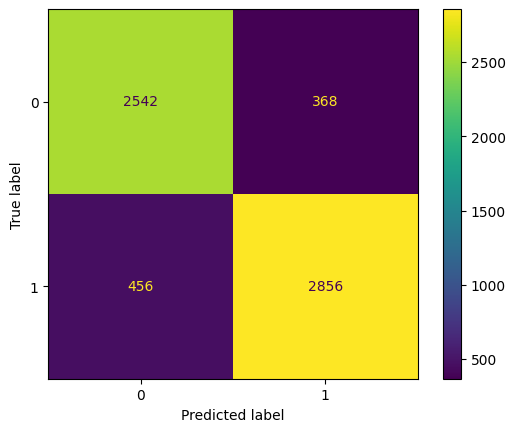

In [111]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


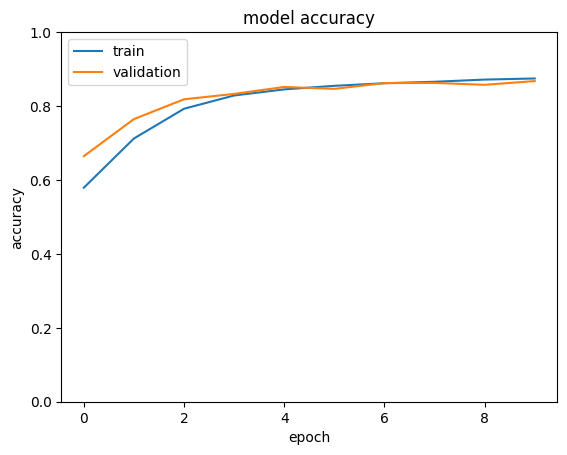

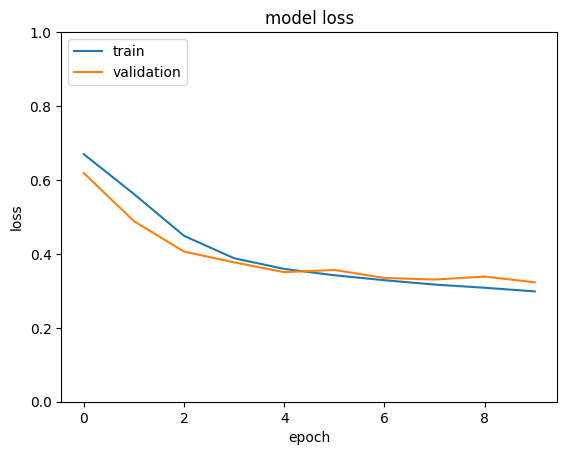

In [112]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0, 1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Now we will validate this model using the external dataset.

In [113]:
extval_predicts = model.predict(X_extval)
y_preds_extval = [1 * (x[0]>=0.5) for x in extval_predicts]
print(classification_report(y_extval, y_preds_extval))

29/29 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       459
           1       0.86      0.84      0.85       448

    accuracy                           0.86       907
   macro avg       0.86      0.86      0.86       907
weighted avg       0.86      0.86      0.86       907



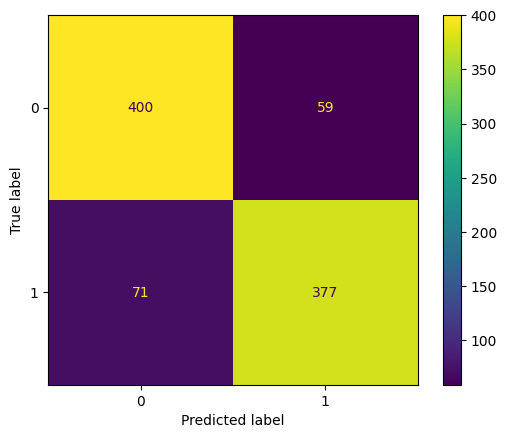

In [114]:
extval_cm = confusion_matrix(y_extval, y_preds_extval)
extval_disp = ConfusionMatrixDisplay(confusion_matrix=extval_cm)
extval_disp.plot()
plt.show()

Now to run over the dataset that includes structure information.

In [115]:
model2 = Sequential()
model2.add(Conv2D(128, kernel_size=(9,3), activation='relu', input_shape=(406,4,1), padding='same'))
model2.add(MaxPooling2D(pool_size=(3,1)))
model2.add(Dropout(0.25))
model2.add(Conv2D(128, kernel_size=(9,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3,1)))
model2.add(Dropout(0.25))
model2.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(3,1)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 406, 4, 128)       3584      
                                                                 
 max_pooling2d_95 (MaxPooli  (None, 135, 4, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_108 (Dropout)       (None, 135, 4, 128)       0         
                                                                 
 conv2d_110 (Conv2D)         (None, 135, 4, 128)       442496    
                                                                 
 max_pooling2d_96 (MaxPooli  (None, 45, 4, 128)        0         
 ng2D)                                                           
                                                                 
 dropout_109 (Dropout)       (None, 45, 4, 128)      

In [116]:
history2 = model2.fit(X_bp_train, y_bp_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_bp_test, y_bp_test))

Epoch 1/10
438/438 [==============================] - 6s 9ms/step - loss: 0.6747 - accuracy: 0.5728 - val_loss: 0.6403 - val_accuracy: 0.6384
Epoch 2/10
438/438 [==============================] - 4s 9ms/step - loss: 0.5846 - accuracy: 0.6952 - val_loss: 0.5176 - val_accuracy: 0.7475
Epoch 3/10
438/438 [==============================] - 4s 9ms/step - loss: 0.4891 - accuracy: 0.7652 - val_loss: 0.4408 - val_accuracy: 0.7944
Epoch 4/10
438/438 [==============================] - 4s 9ms/step - loss: 0.4343 - accuracy: 0.8009 - val_loss: 0.4269 - val_accuracy: 0.8009
Epoch 5/10
438/438 [==============================] - 4s 9ms/step - loss: 0.4027 - accuracy: 0.8196 - val_loss: 0.3906 - val_accuracy: 0.8259
Epoch 6/10
438/438 [==============================] - 4s 9ms/step - loss: 0.3857 - accuracy: 0.8305 - val_loss: 0.3952 - val_accuracy: 0.8226
Epoch 7/10
438/438 [==============================] - 4s 9ms/step - loss: 0.3687 - accuracy: 0.8399 - val_loss: 0.3715 - val_accuracy: 0.8359
Epoch 

In [117]:
val_predicts2 = model2.predict(X_bp_test)
y_preds2 = [1 * (x[0]>=0.5) for x in val_predicts2]
print(classification_report(y_bp_test, y_preds2))

195/195 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2910
           1       0.88      0.82      0.85      3312

    accuracy                           0.84      6222
   macro avg       0.84      0.85      0.84      6222
weighted avg       0.85      0.84      0.84      6222



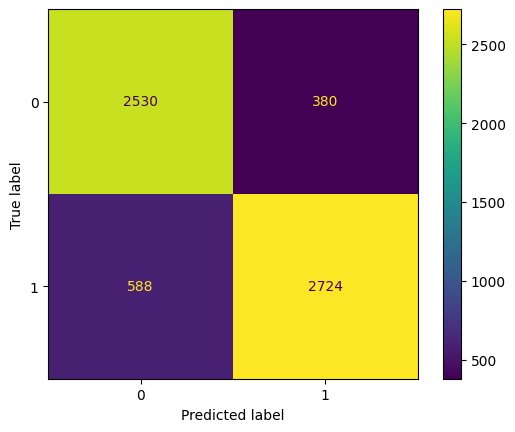

In [118]:
cm2 = confusion_matrix(y_bp_test, y_preds2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


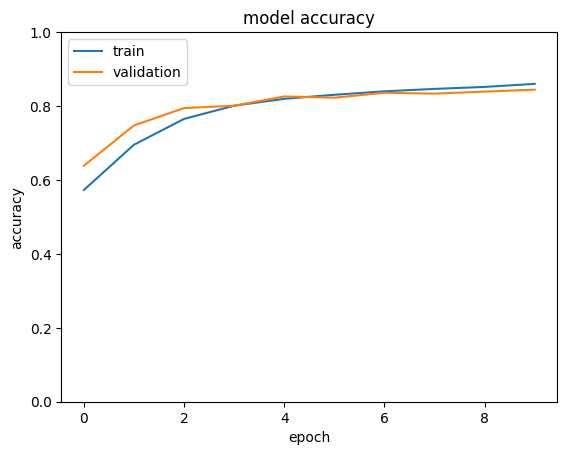

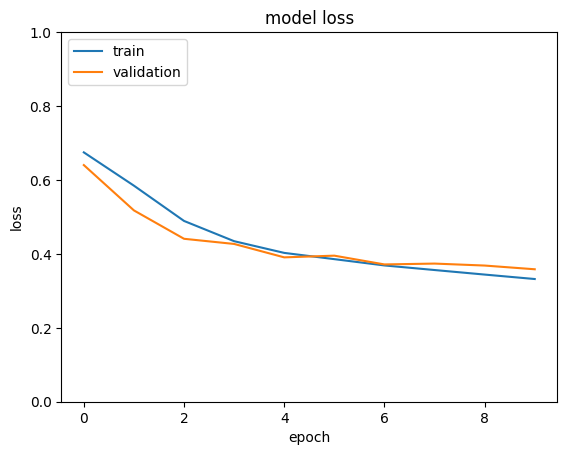

In [119]:
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim(0, 1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Now to validate on the external dataset.

In [120]:
extval_predicts2 = model.predict(X_bp_extval)
y_preds_extval2 = [1 * (x[0]>=0.5) for x in extval_predicts2]
print(classification_report(y_bp_extval, y_preds_extval2))

29/29 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       459
           1       0.88      0.67      0.76       448

    accuracy                           0.79       907
   macro avg       0.81      0.79      0.79       907
weighted avg       0.81      0.79      0.79       907



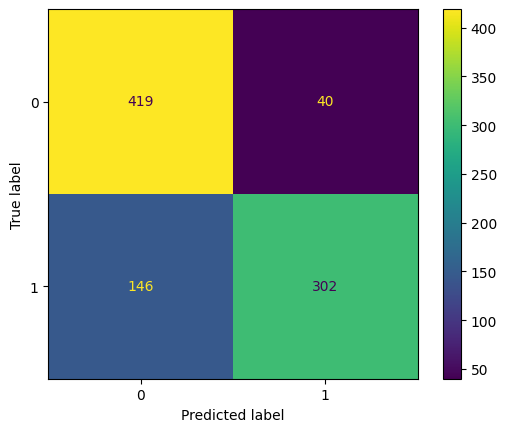

In [121]:
extval_cm2 = confusion_matrix(y_bp_extval, y_preds_extval2)
extval_disp2 = ConfusionMatrixDisplay(confusion_matrix=extval_cm2)
extval_disp2.plot()
plt.show()

In [132]:
scoring_dict = {0: {'data':'Sequence Only Data', 'validation':'Test Set', 'Accuracy':0.87},
                1: {'data':'Sequence Only Data', 'validation':'External Validation Set', 'Accuracy':0.86},
                2: {'data':'Base Pairing & Sequence Data', 'validation':'Test Set', 'Accuracy':0.84},
                3: {'data':'Base Pairing & Sequence Data', 'validation':'External Validation Set', 'Accuracy':0.79}}
scores_df = pd.DataFrame(scoring_dict).T

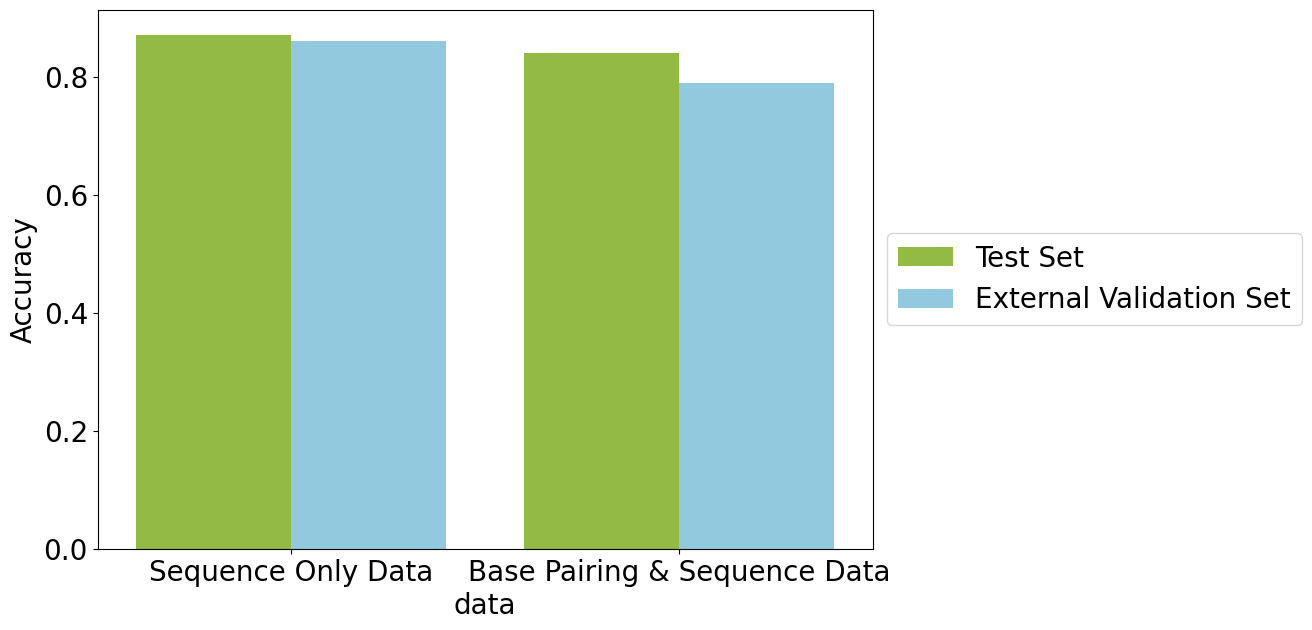

In [133]:
colors = {'Test Set':'yellowgreen', 'External Validation Set':'skyblue'}
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
ax = sns.barplot(data=scores_df, x='data', y='Accuracy', hue='validation', palette=colors)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();